## Intro

This technique, such as the previous ones, are mostly used to cluster
documents based on their content. To achieve this, it uses the
co-occurrences matrix of words. The process involves detecting hidden
patterns (Latent) in words to determinate their meaning based on the
context (semantic). Similarly to LDA, LSI follows the *maxima* that
words that occur in the same context, will have a higher probability of
having similar meanings.

In Figure [5](#fig:LSI){reference-type="ref" reference="fig:LSI"} is
showed the main process to execute LSI. From a BoW matrix or a TFIDF
matrix, we can use a dimension reduction algorithm to extract topic
values. It is a similar process to NMF, which also reduces the
dimensions, although in this case, the relationship between words and
documents is made with singular values, which are related with eigen
values. Instead of Principal Component Analysis, Singular Value
Decomposition is used, because it works better with sparse matrices.
From applying SVD, the result is a topic encoded matrix, with the
desired number of components as columns.

![Latent Semantic Indexing (LSI) by means of the Singular Value
Decomposition (SVD) of the sparse BoW/TFIDF matrix $A$. The resulting
$U$ and $V^T$ are the topic encoded matrices from which the relationship
between documents and words with topics is defined. The matrix $\Sigma$
is the Singular Matrix with eigenvalues as the
diagonal.](Figures/SVD.png)

The LSI is the application of the Singular Value Decomposition, which is
a data reduction method based on the consideration that:

$$A = U \Sigma V^T$$

, being $A$ any matrix (in this case the sparse matrix of BoW/TFIDF),
$U$ the left singular matrix, which provides the relationship between
words and topics, and $V^T$ is the right singular matrix, which shows
the relationship between documents and topics. The matrix $\Sigma$ has a
diagonal of eigenvalues.
This method works better with TFIDF models and the result is a semantic vectorization that can be used to find similarities between sentences or documents. 

Predicted classification:
[0 0 0 0 0 1 1 1 1]


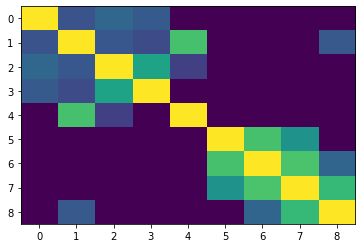

In [9]:
from collections import defaultdict
from gensim import corpora
from gensim import models
from gensim import similarities

import matplotlib.pyplot as plt

documents = [
    "Human machine interface for lab abc computer applications",
    "A survey of user opinion of computer system response time",
    "The EPS user interface management system",
    "System and human system engineering testing of EPS",
    "Relation of user perceived response time to error measurement",
    "The generation of random binary unordered trees",
    "The intersection graph of paths in trees",
    "Graph minors IV Widths of trees and well quasi ordering",
    "Graph minors A survey",
]

# remove common words and tokenize
stoplist = set('for a of the and to in'.split())
texts = [
    [word for word in document.lower().split() if word not in stoplist]
    for document in documents
]

# remove words that appear only once
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [
    [token for token in text if frequency[token] > 1]
    for text in texts
]

dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

tfidf = models.TfidfModel(corpus)  # step 1 -- initialize a model
corpus_tfidf = tfidf[corpus]

lsi_model = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=10) # initialize an LSI transformation
corpus_lsi = lsi_model[corpus_tfidf] 

index = similarities.MatrixSimilarity(corpus_lsi)
self_sims = index[corpus_lsi]

plt.imshow(self_sims, aspect="auto")

#From LSI we converted the TFIDF to LSI vector space. Now, to get the classification, we should cluster the similarity matrix (as an example)
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(self_sims)
pred = kmeans.labels_

print("Predicted classification:")
print(pred)

## References

- https://radimrehurek.com/gensim/auto_examples/core/run_topics_and_transformations.html#sphx-glr-auto-examples-core-run-topics-and-transformations-py